# Clustering Algorithms Comparison on Wine Data

#### Compared Algorithms:
    * K-Means Clustering
    * Agglomerative Clustering
    * DBSCAN Clustering
    * Mean-Shift Clustering
    * BIRCH Clustering
    * Affinity Propagation
    * Mini-batch k-means
    * Spectral Clustering
    
## Objective
   _Clustering aims to maximize intra-cluster similarity and minimize inter-cluster similarity._

    Each clustering problems requires own unique solutions. According to my observation, most of tutorials and guidebooks focus on K-means clustering and the data preparation process before. I want to introduce other clustering algorithms and  to inform when do we need other algorithms. 
    
## Data
   Due to more practical explanation, I am going to use
   [Wine Dataset](https://www.kaggle.com/harrywang/wine-dataset-for-clustering)

## Review of the Data

In [3]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\arda\anaconda3\lib\site-packages (0.24.0)


In [24]:
import sklearn
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [132]:
data = pd.read_csv(r'C:\Users\Arda\Downloads\archive (2)/wine-clustering1.csv')

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,0,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,0,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,0,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,1,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,0,1.04,2.93,735


In [133]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity           int64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [134]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [135]:
data.describe()



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.591124,0.280899,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572394,0.450706,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,0.000000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,0.000000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,0.000000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,1.000000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,1.000000,1.710000,4.000000,1680.000000


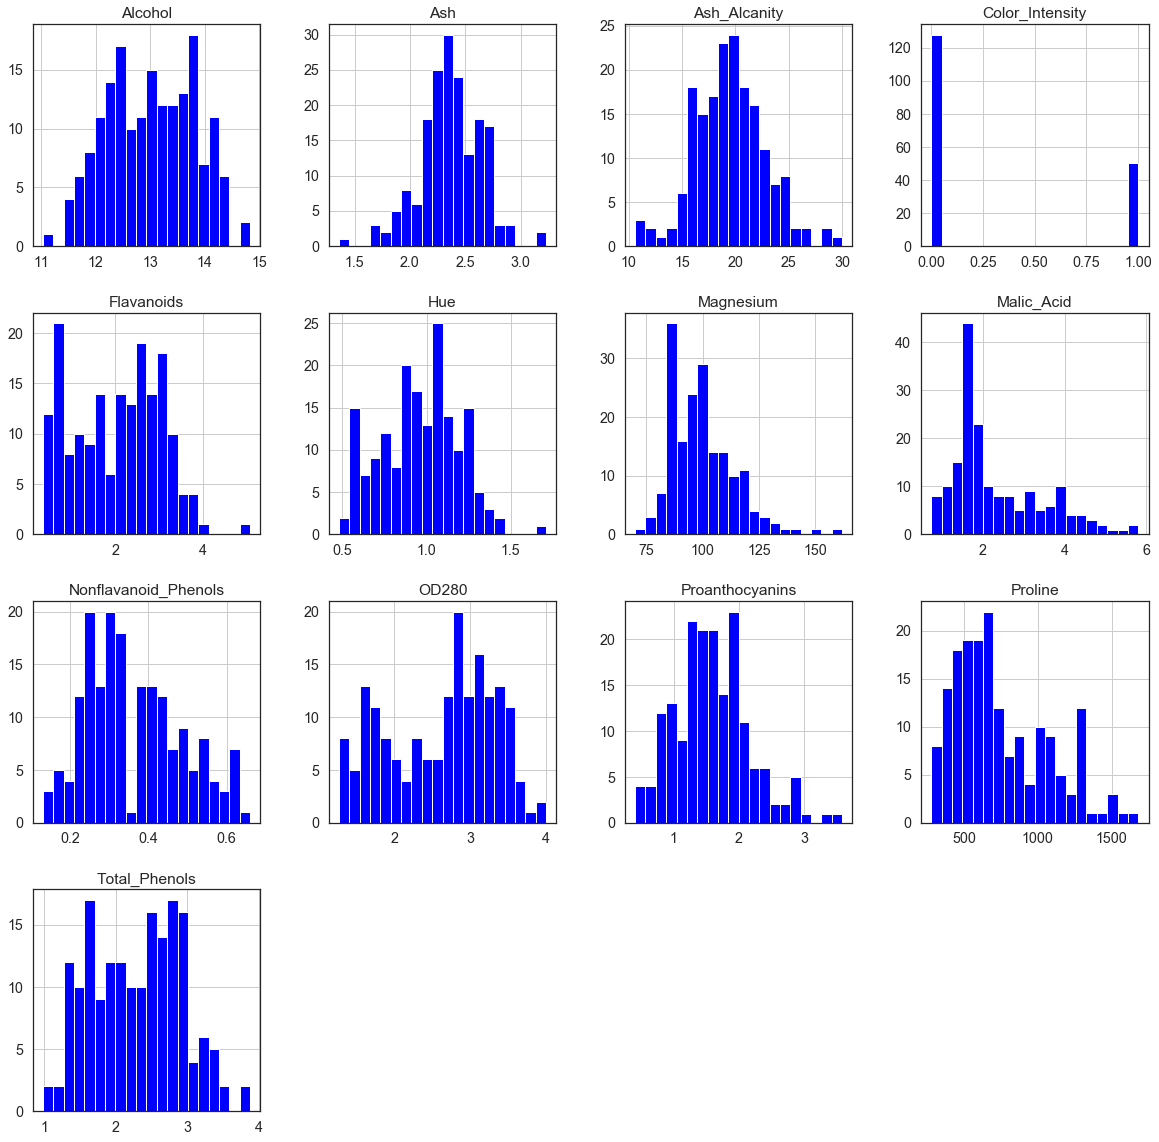

In [136]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='blue')

Some of our features distributed normally some of not, it is natural. Most important insight in the figure above is there are not well balanced red and white wine distribution. Number of white wines almost 3 times of red wines. This is an essential point for algorithm performance.

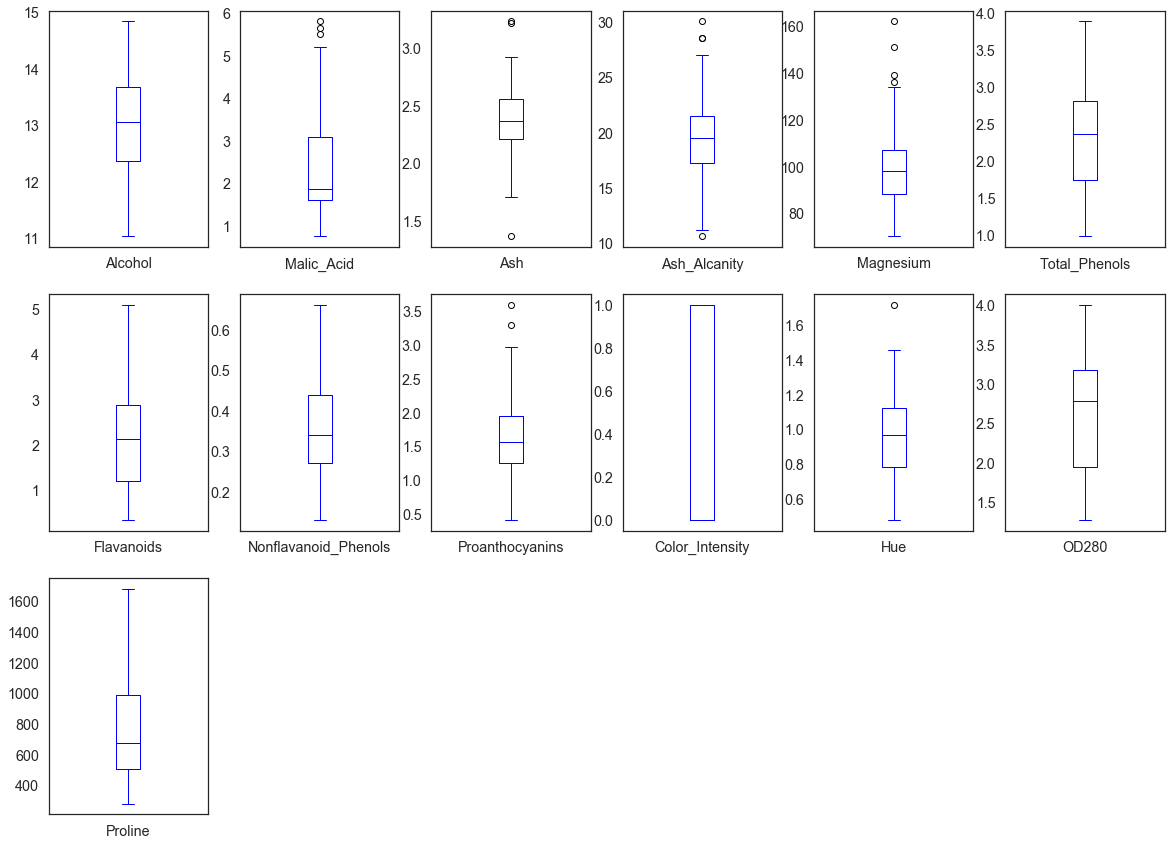

In [137]:
data.plot( kind = 'box', subplots = True, layout = (4,6), sharex = False, sharey = False,color='blue')
plt.show()

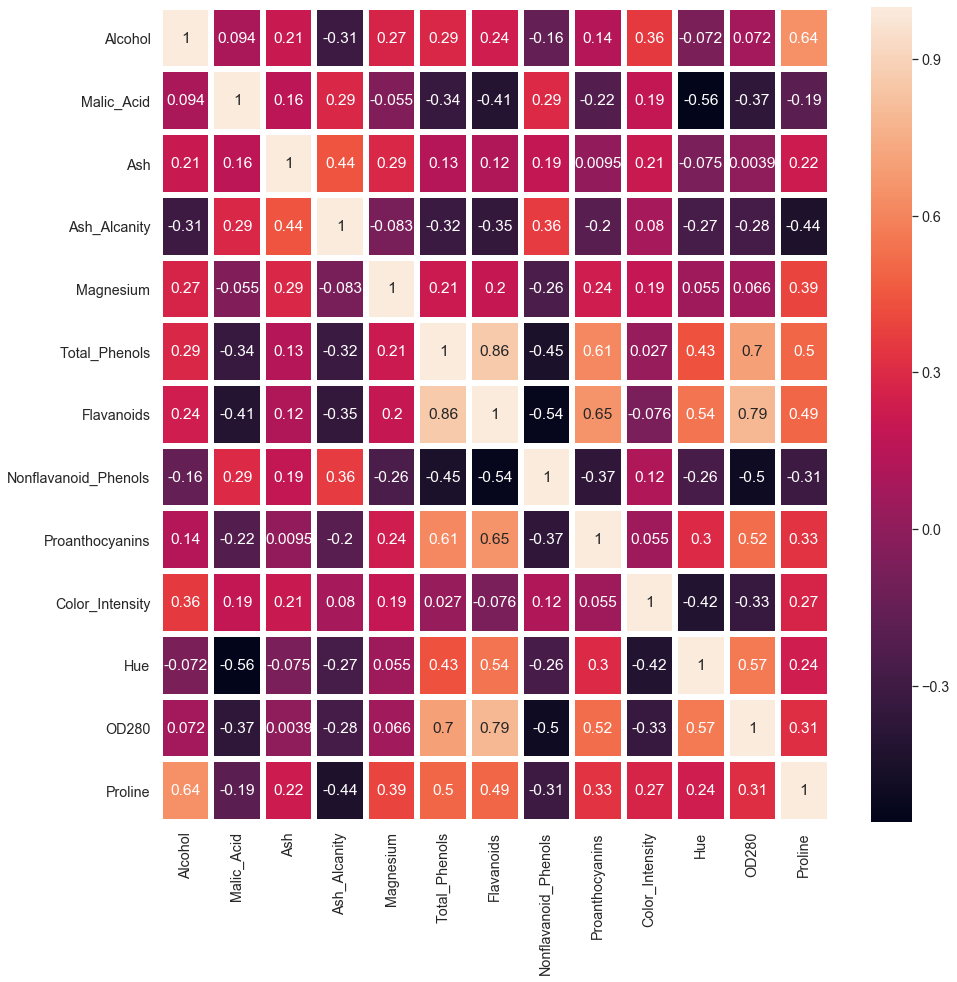

In [138]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True, linewidths=5, ax=ax)
plt.show()

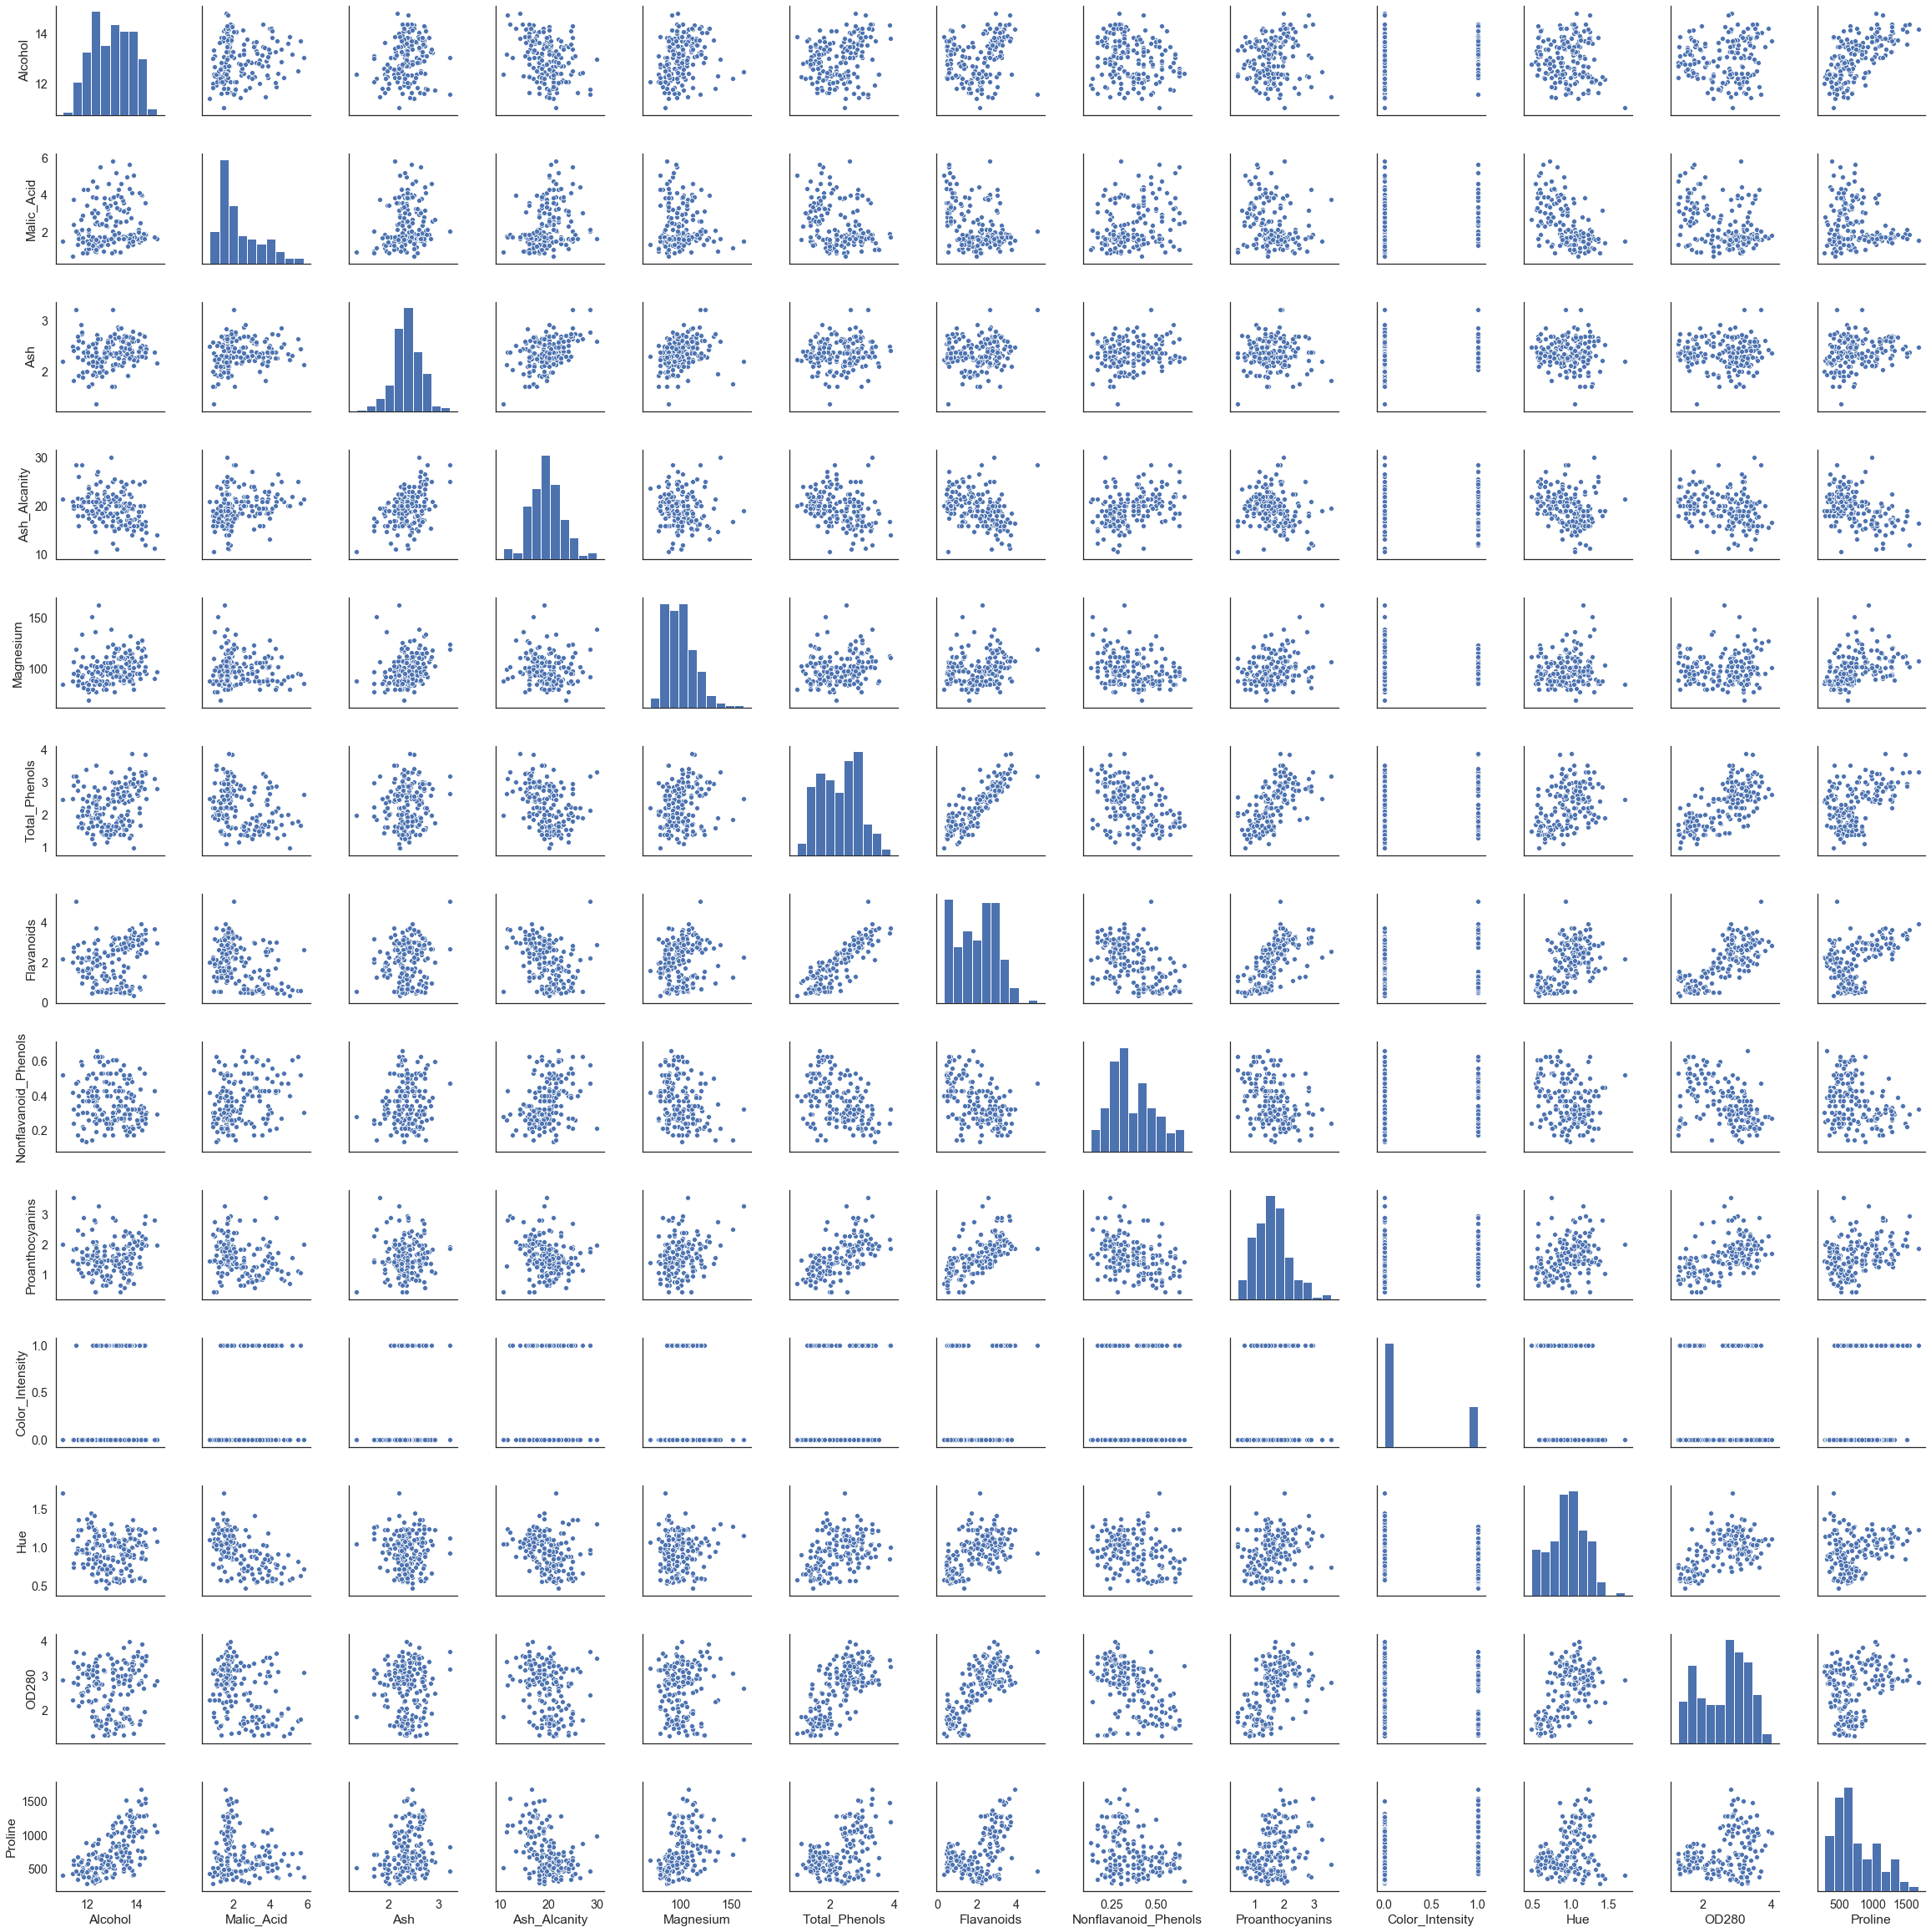

In [139]:

sns.pairplot(data)

As you can see, there are lots of similar features and noise in the data. We should apply dimension reduction techniques for
well selected features for clustering algorithms. 

## Dimension Reduction

## Clustering Algorithms
### 1) Centroid Based
        Cluster represented by central reference vector which may not be a part of the original data e.g k-means clustering
        
        * K-means Clustering
### 2) Hierarchical 
        Connectivity based clustering based on the core idea that points are connected to points close by rather than 
        further away. A cluster can be defined largely by the maximum distance needed to connect different parts of the
        cluster. Algorithms do not partition the dataset but instead construct a tree of points which are typically 
        merged together.
        
        * Agglomerative Clustering
        * BIRCH Clustering
### 3) Distribution Based
        Built on statistical distribution models - objects of a cluster are the ones which belong likely to same 
        distribution. Tend to be complex clustering models which might be prone to overfitting on data points
        
        * Gausssian mixture models
### 4) Density Based
        Create clusters from areas which have a higher density of data points. Objects in sparse areas, which seperate 
        clusters, are considered noise and border points.
        
        * DBSCAN Clustering
        * Mean-shift Clustering

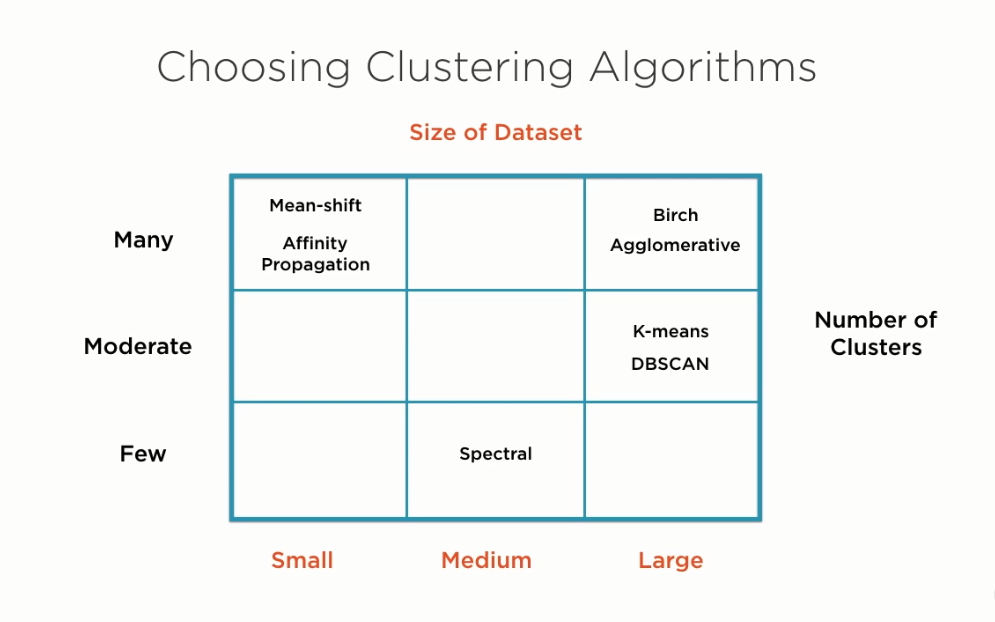

In [141]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

In [228]:
wine_df = pd.read_csv('C:/Users/Arda/Downloads/archive (2)/wine-clustering1.csv')



In [229]:
wine_df.shape

(178, 13)

In [230]:
wine_df = wine_df.sample(frac=1).reset_index(drop=True)
wine_df.head()
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null int64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(10), int64(3)
memory usage: 18.2 KB


In [231]:
wine_features = wine_df.drop('Color_Intensity', axis=1)
wine_features.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Hue,OD280,Proline
0,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,0.75,1.27,720
1,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,0.73,3.10,380
2,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,0.96,2.52,500
3,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,1.08,2.27,480
4,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,1.23,2.87,990


In [232]:
is_wine_red_or_white = wine_df['Color_Intensity']
is_wine_red_or_white.sample(5)

91     0
162    0
132    0
160    0
78     0
Name: Color_Intensity, dtype: int64

### Evaluation Metrics
##### Homogeneity Score
    Clustering satisfies homogeneity if all of its clusters contains only points which are members of a single class.
    The actual label values do not matter i.e the fact that actual label 1 corresponds to cluster label 2 does
    not affect this score
##### Completeness Score
    Clustering satisfies completeness if all the points that are members of the same class belong to the same cluster
##### V Measure Score
    Harmonic mean of homogeneity and completeness score - usually used to find the avarage of rates
##### Adjusted Rand Score
    Similarity measure between clusters which is adjusted for chance i.e random labeling of data points
    Close to 0: data was randomly labeled
    Exact 1: actual and predicted clusters are identical 
##### Adjusted Mutual Information Score
    Information obtained about one random variable by observing another random variable adjusted to account for chance
    Close to 0: data was randomly labeled
    Exact 1: actual and predicted clusters are identical
##### Silhouette Score
    Uses a distance metric to measure how similar a point is to its own cluster and how dissimilar the point is from
    points in other clusters. Ranges between -1 and 1 and positive values closer to 1 indicate that the clustering
    was good


In [233]:
def BuildModel(clustering_model,data,labels):
    model=clustering_model(data)
    print('homo\tcompl\tv-means\tARI\tAMI\tsilhouette')
    print(50*'_')
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
         %(metrics.homogeneity_score(labels, model.labels_),
           metrics.completeness_score(labels, model.labels_),
           metrics.v_measure_score(labels, model.labels_),
           metrics.adjusted_rand_score(labels, model.labels_),
           metrics.adjusted_mutual_info_score(labels, model.labels_),
           metrics.silhouette_score(data,model.labels_)))

#### K-Means Clustering
    To process the learning data, the K-means algorithm in data mining starts with a first group of randomly
    selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) 
    calculations to optimize the positions of the centroids.It halts creating and optimizing clusters when either:
    The centroids have stabilized — there is no change in their values because the clustering has been successful.
    The defined number of iterations has been achieved.
    
    
### Contrasting K-Means and Hierarchical Clustering
##### K-Means
    * Need distance measure as well as way to aggregate points in a cluster
    * Must represent data as vectors in N-dimensional hyperspace
    * Data representation can be difficult for complex data types
    * Variants can efficiently deal with very large datasets on disk
##### Hierarchical
    * Only need distance measure; do not need way to combine points in cluster
    * No need to express data as vectors in N-dimensional hyperspace
    * Relatively simple to represent even complex documents
    * Even with careful construction too computationaly expensive for large datasets on disk

In [234]:
def k_means(data,n_clusters=2, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [235]:
BuildModel(k_means,wine_df,is_wine_red_or_white)

homo	compl	v-means	ARI	AMI	silhouette
__________________________________________________
0.012	0.012	0.012	0.042	0.008	0.657


#### According to scores our k-means cluster perform did not well. Let's try other algorithms and hope an accuracy improvement